In [1621]:
# Use /usr/local/bin/python3 Kernel

In [1622]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys

# Import the data
if sys.platform == 'darwin':
    df = pd.read_csv("/Users/aymericvie/Documents/GitHub/evology/evology/code/rundata/run_data.csv")
if sys.platform == 'win32':
    df = pd.read_csv("D:/OneDrive/Research/2021_Market_Ecology/evology/evology/code/rundata/run_data.csv")

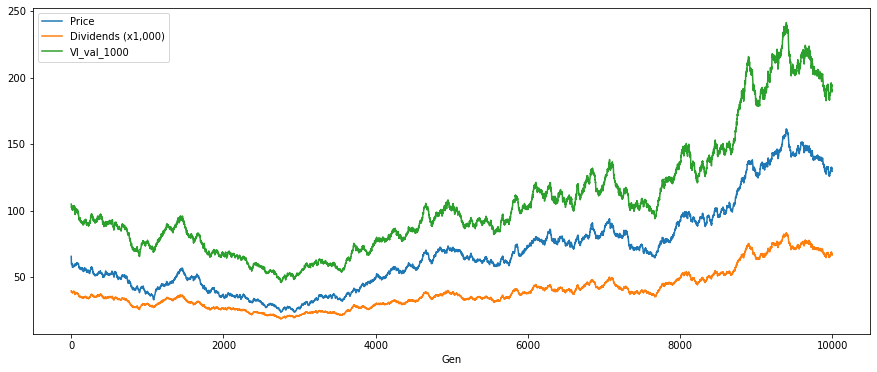

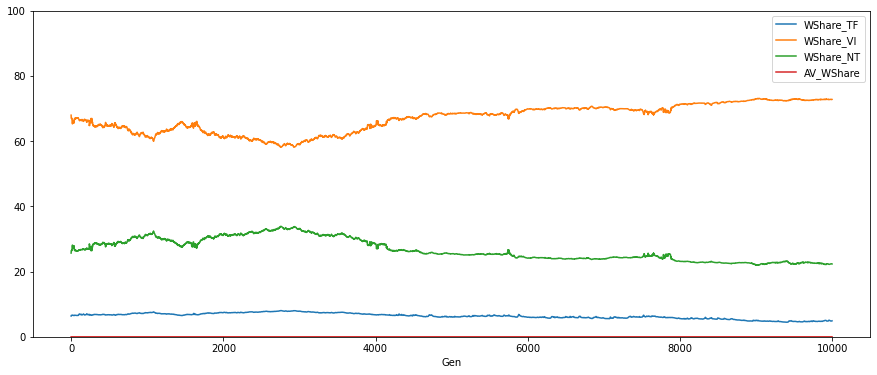

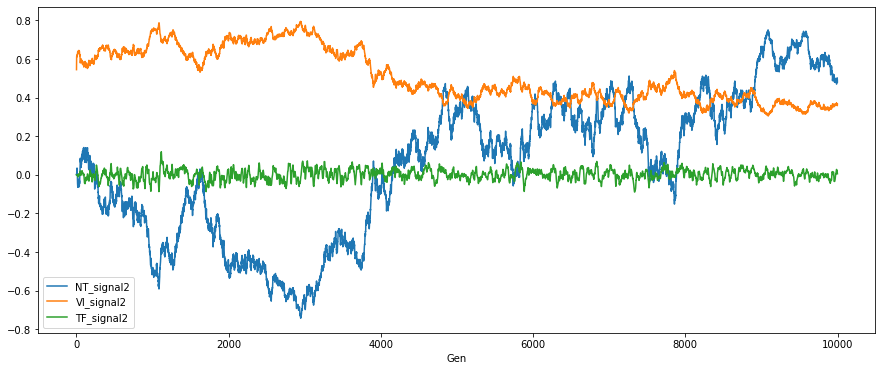

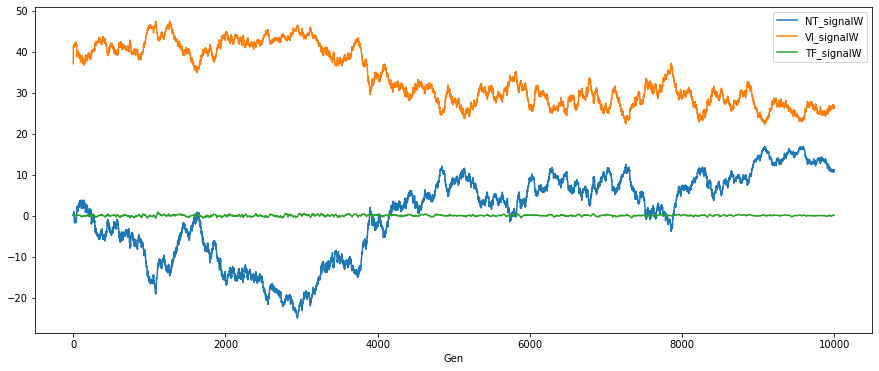

In [1623]:
df['Dividends (x1,000)'] = 10000 * df['Dividends']
df['Process (x100)'] = 100 * df['NT_process'].add(1)
df['VI_val_1000'] = df['VI_val']
df['PriceEma'] = pd.Series.ewm(df['Price'], span=21).mean()

df.plot(x="Gen", y = ['Price', 'Dividends (x1,000)', 'VI_val_1000'],
        kind="line", figsize=(15, 6))
plt.show()

df.plot(x="Gen", y = ["WShare_TF", "WShare_VI", "WShare_NT", "AV_WShare"],
        kind="line", figsize=(15, 6), ylim=(0,100))
plt.show()

df['NT_signal2'] = np.tanh(df['NT_signal'])
df['VI_signal2'] = np.tanh(df['VI_signal'])
df['TF_signal2'] = np.tanh(df['TF_signal'])

df.plot(x="Gen", y=["NT_signal2", "VI_signal2", "TF_signal2"],
        kind="line", figsize=(15, 6))
plt.show()



df['NT_signalW'] = np.tanh(df['NT_signal']) * df['WShare_NT']
df['VI_signalW'] = np.tanh(df['VI_signal']) * df['WShare_VI']
df['TF_signalW'] = np.tanh(df['TF_signal']) * df['WShare_TF']

df.plot(x="Gen", y=["NT_signalW", "VI_signalW", "TF_signalW"],
        kind="line", figsize=(15, 6))
plt.show()







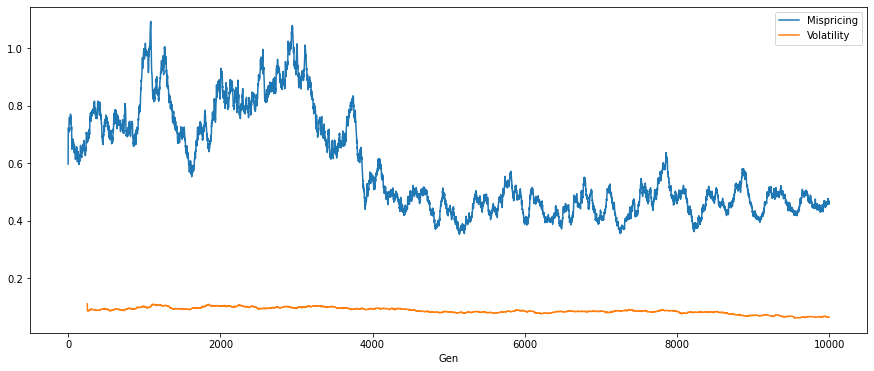

In [1624]:
if df["Gen"].iloc[-1] >= 252:
    df["LogPriceReturns"] = np.log(df["Price"]/df["Price"].shift(1))
    df["Volatility"] = df["LogPriceReturns"].rolling(window=252).std()*np.sqrt(252)
    volatility = df["Volatility"].mean()


else:
    volatility = np.nan
    # mispricing = np.nan

df["Mispricing"] = abs((df["VI_val"] / df["Price"]) - 1)
mispricing = df["Mispricing"].mean()
            
df.plot(x="Gen", y=["Mispricing", "Volatility"],
        kind="line", figsize=(15, 6))
plt.show()

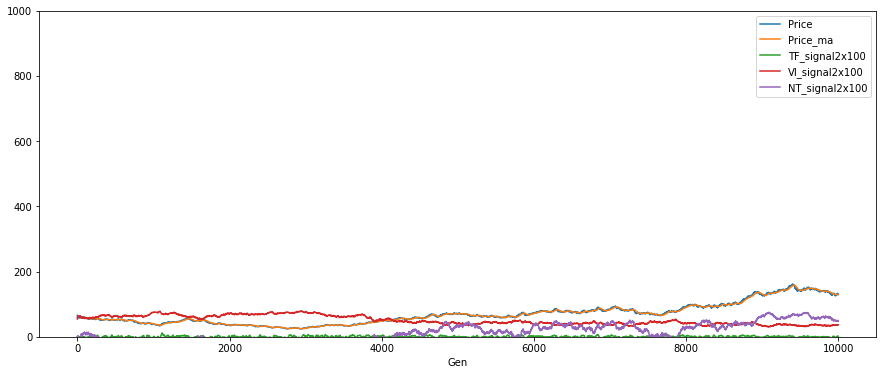

In [1625]:
df['TF_signal2x100'] = 100 * np.tanh(df['TF_signal'])
df['NT_signal2x100'] = 100 * np.tanh(df['NT_signal'])
df['VI_signal2x100'] = 100 * np.tanh(df['VI_signal'])

df["Price_ma"] = df["Price"].rolling(50).mean()

df.plot(x="Gen", y=["Price", "Price_ma", "TF_signal2x100", "VI_signal2x100", 'NT_signal2x100'],
        kind="line", figsize=(15, 6), ylim = (0, 1000))
plt.show()

[4.189447010513609e-05, 6.136784924856306e-05, 2.7581839910268914e-05]


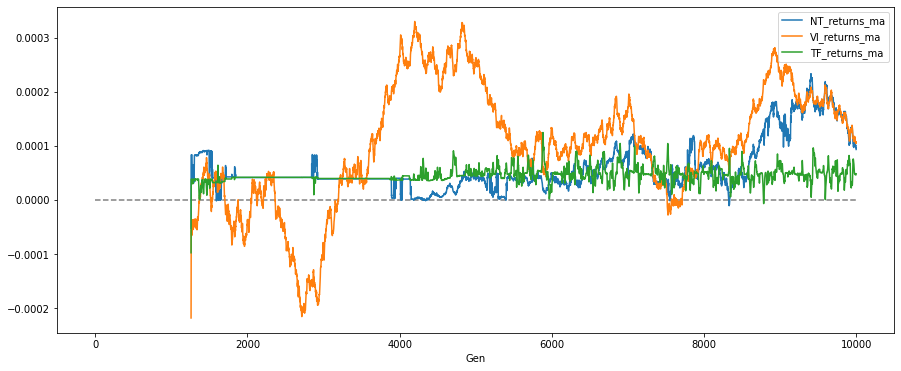

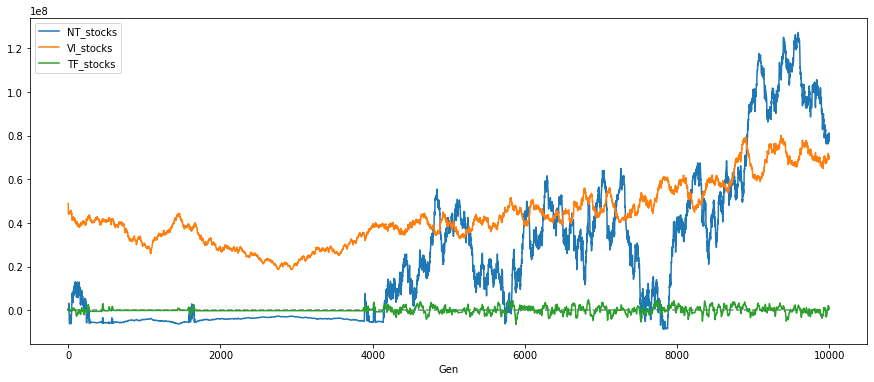

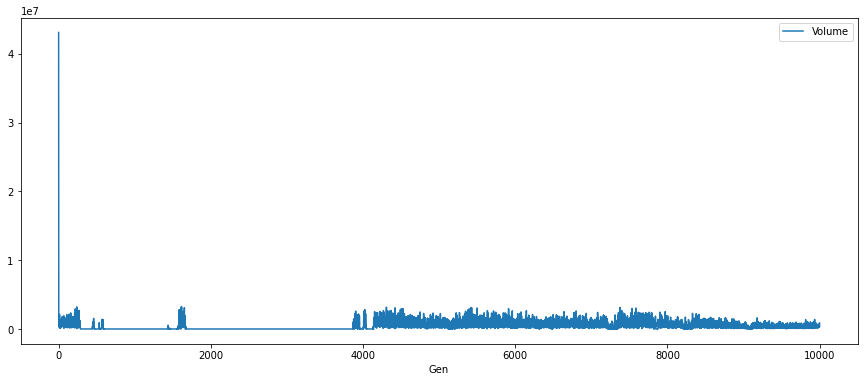

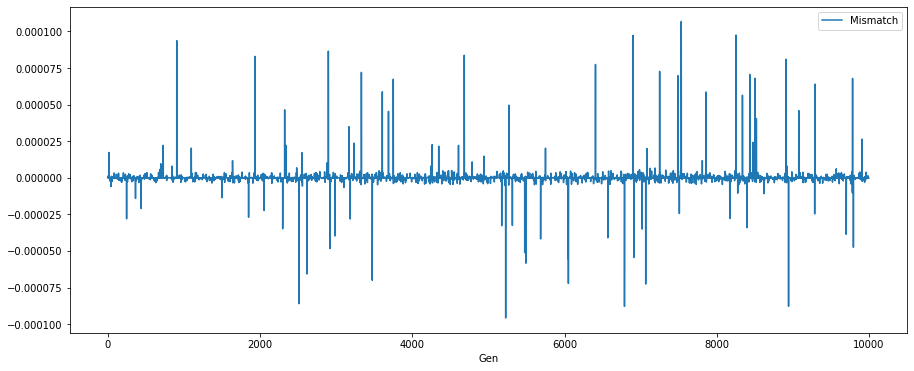

In [1626]:
df["NT_returns_ma"] = df["NT_returns"].rolling(252*5).mean()
df["VI_returns_ma"] = df["VI_returns"].rolling(252*5).mean()
df["TF_returns_ma"] = df["TF_returns"].rolling(252*5).mean()

print([df["NT_returns"].mean(), df["VI_returns"].mean(), df["TF_returns"].mean()])

df.plot(x="Gen", y = ["NT_returns_ma", "VI_returns_ma", "TF_returns_ma"],
        kind="line", figsize=(15, 6))
plt.hlines(y=0, xmin = 0, xmax = max(df["Gen"]), colors='gray', linestyles='dashed')
plt.show()

df.plot(x="Gen", y = ["NT_stocks", "VI_stocks", "TF_stocks"],
        kind="line", figsize=(15, 6))
plt.hlines(y=0, xmin = 0, xmax = max(df["Gen"]), colors='gray', linestyles='dashed')
plt.show()

df.plot(x="Gen", y = ['Volume'],
        kind="line", figsize=(15, 6))
plt.show()

df.plot(x="Gen", y = ['Mismatch'],
        kind="line", figsize=(15, 6))
plt.show()


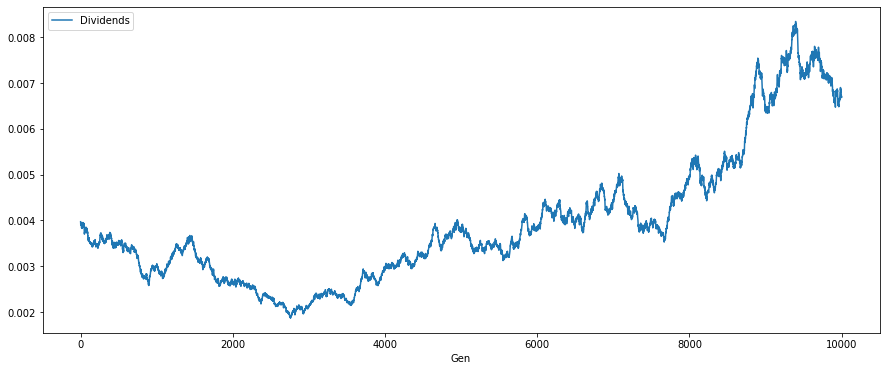

In [1627]:
df.plot(x="Gen", y = ['Dividends'],
        kind="line", figsize=(15, 6))
plt.show()

0.019703580330467353
9999
0.019703580330467353
nan


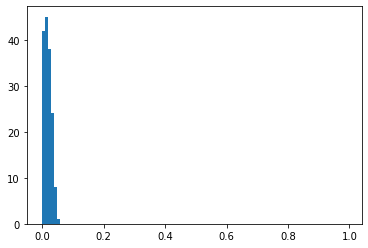

In [1628]:
pct_changes = list(df['nav_pct'])
# print(pct_changes)
print(np.nanmean(pct_changes))
print(len(pct_changes))
for i in range(len(pct_changes)):
    if pct_changes[i] > 100:
        pct_changes[i] = np.nan
print(np.nanmean(pct_changes))
print(max(pct_changes))
bins = range(0,100)
bins = [item / 100 for item in bins]
plt.hist(pct_changes, bins = bins)
plt.show()
# bins = range(0,10)
# bins = [item / 100 for item in bins]
# plt.hist(pct_changes, bins = bins)
# plt.show()


short volume ratio
3.5284668368440175
Short ratio (numb short sold / avg rolling volume)
892626.7021253301
4.05287004524018
Short % of float 
3.3835032562699707


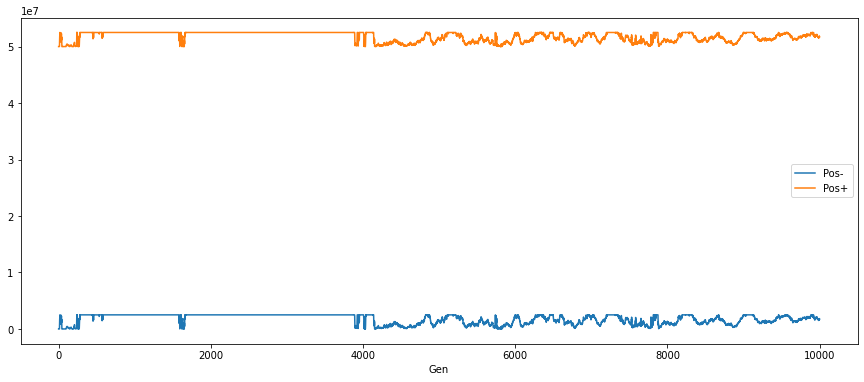

In [1629]:
# Calibration of short volume ratio

print('short volume ratio')
asset_supply = df["Pos+"].mean() - df["Pos-"].mean()
# Average short volume ratio in our ABM:
print(100 * df["Pos-"].mean() / asset_supply)

print('Short ratio (numb short sold / avg rolling volume)')
# Short interest ratio as days to cover
df["short_ratio"] = df["Pos-"] / (df["Volume"] + 1)
print(df["short_ratio"].mean())
print(df["Pos-"].mean() / df["Volume"].mean())

# Short interest as percentage of float (outstanding)
print('Short % of float ')
df["FloatPer"] = df["Pos-"] / df["Pos+"]
# df["FloatPer"] = df["Pos-"] / asset_supply
print(100 * df["FloatPer"].mean())

df.plot(x="Gen", y = ["Pos-", "Pos+"],
        kind="line", figsize=(15, 6))
plt.show()

# the short volume ratio and short percentage of float are consistent after limiting max short size
# However, the short ratio (to volumne) is higher. It mostly means that the short positions are liquidated much faster in our model. 
# But siunce they still occupy the same relative amount to outstanding shares, it just means that they are closed/opened at higher frequencies
# than in regular data. Which makes sense because not all happens at a daily scale, and there are some funds who maintain short positions
# over long time horizons.

In [1630]:
print(df['WShare_VI'].iloc[-1])
print(df['WShare_NT'].iloc[-1])
print(df['WShare_TF'].iloc[-1])

72.79273087783353
22.32156559397693
4.8857035281895245


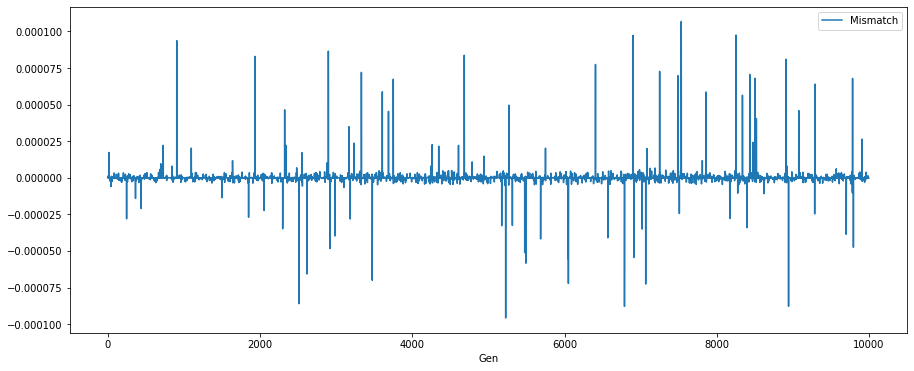

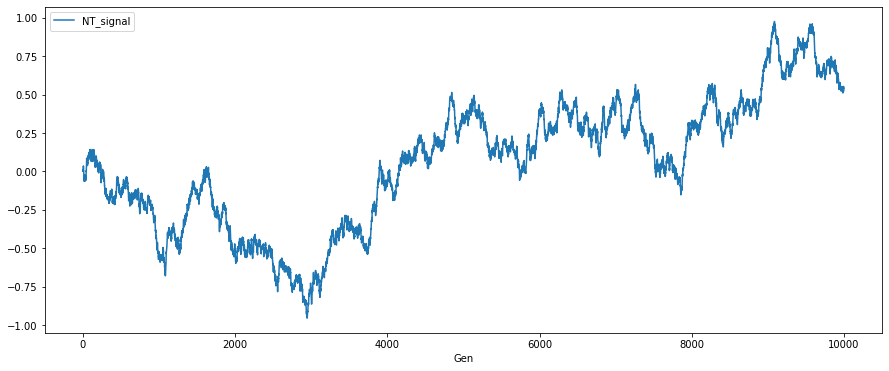

In [1631]:

df.plot(x="Gen", y = ["Mismatch"],
        kind="line", figsize=(15, 6))
plt.show()


df.plot(x="Gen", y = ["NT_signal"],
        kind="line", figsize=(15, 6))
plt.show()



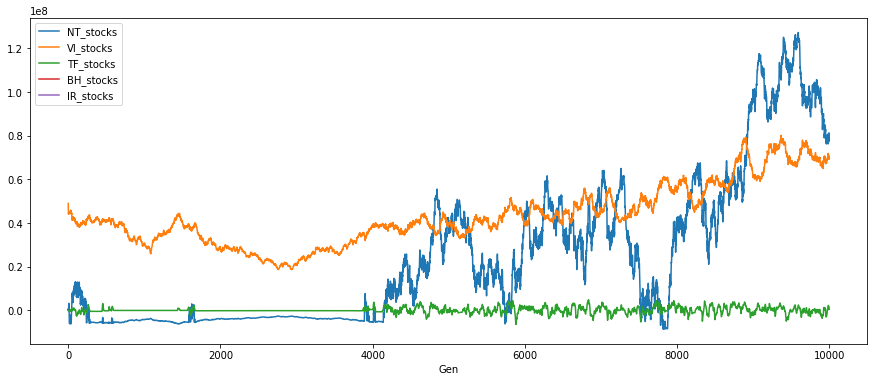

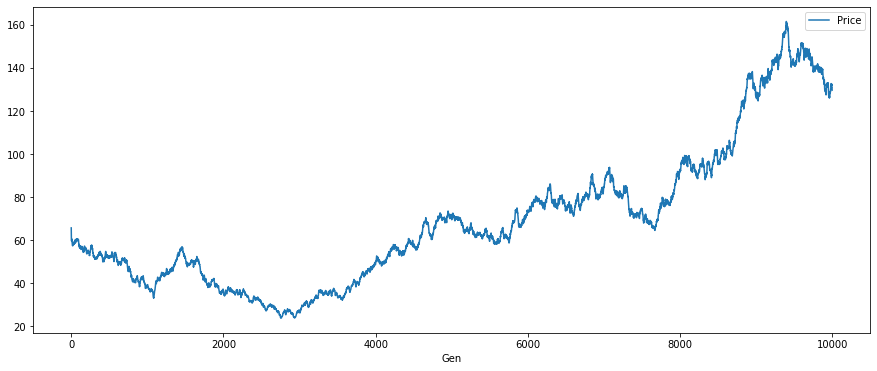

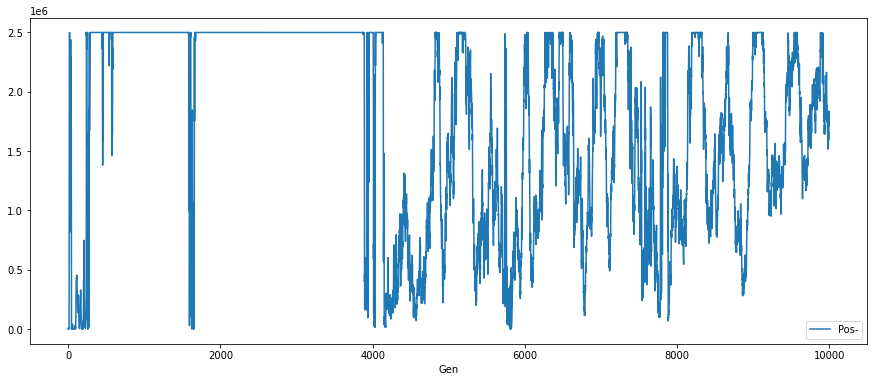

In [1632]:
df.plot(x="Gen", y = ["NT_stocks", "VI_stocks", "TF_stocks", "BH_stocks", "IR_stocks"],
        kind="line", figsize=(15, 6))
plt.show()

df.plot(x="Gen", y = ["Price"],
        kind="line", figsize=(15, 6))
plt.show()


df.plot(x="Gen", y = ["Pos-"],
        kind="line", figsize=(15, 6))
plt.show()


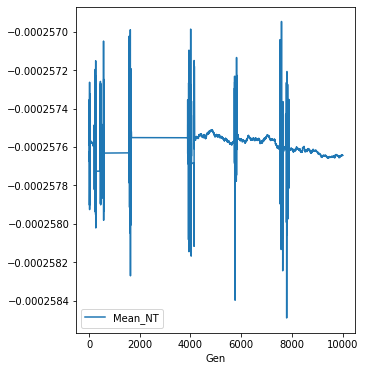

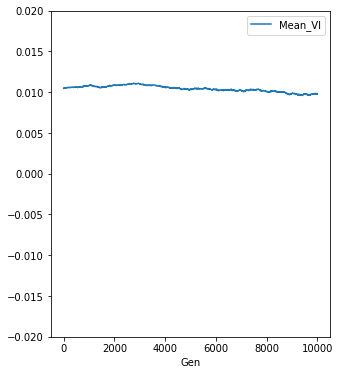

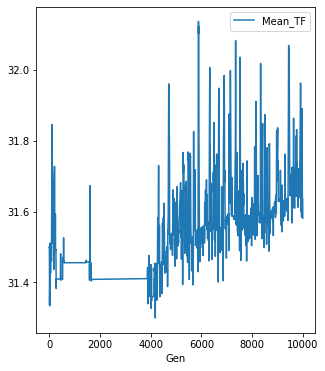

In [1633]:

df.plot(x="Gen", y = ["Mean_NT"],
        kind="line", figsize=(5, 6))
plt.show()
df.plot(x="Gen", y = ["Mean_VI"],
        kind="line", figsize=(5, 6), ylim=(-0.02, 0.02))
plt.show()
df.plot(x="Gen", y = ["Mean_TF"],
        kind="line", figsize=(5, 6))
plt.show()

In [1634]:
if df["Spoils"].sum() != 0:
        df.plot(x="Gen", y = ["Spoils"],
                kind="line", figsize=(15, 6))
        plt.show()


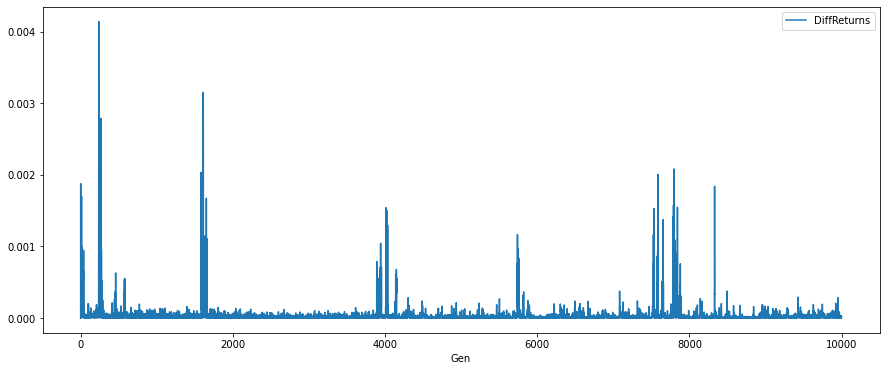

In [1635]:
df.plot(x="Gen", y = ["DiffReturns"],
        kind="line", figsize=(15, 6))
plt.show()




2.1614712370244516e-05
2.1984739743857134e-05


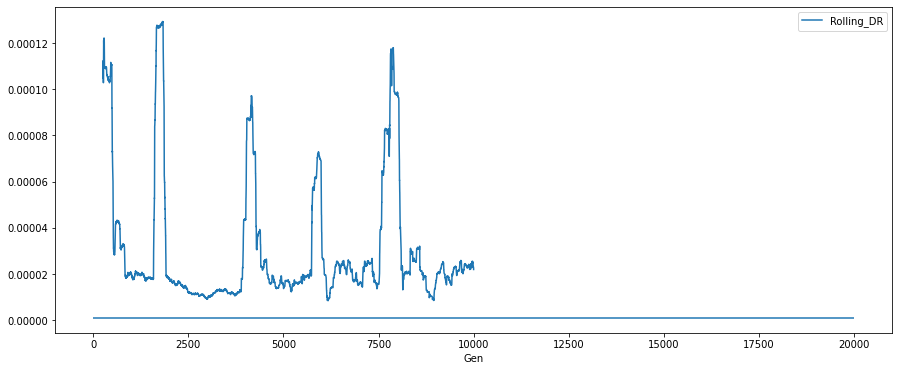

In [1636]:

avg = df.tail(1000)["DiffReturns"].mean()
print(avg)


avg = df.tail(252)["DiffReturns"].mean()
print(avg)

# what is the first time after which we have spent 252 days with negligeable diff returns?
df["Rolling_DR"] = df["DiffReturns"].rolling(252).mean()

tol = 0.000001

df.plot(x="Gen", y = ["Rolling_DR"],
        kind="line", figsize=(15, 6))
plt.hlines(y=tol, xmin = 0, xmax = 20000)
plt.show()

for i in range(len(df["Gen"])):
    if df["Rolling_DR"].iloc[i] <= tol:
        print(i)
        break


In [1637]:
SharpeNT = np.nanmean(df['NT_returns']) / np.nanstd(df['NT_returns'])
SharpeVI = np.nanmean(df['VI_returns']) / np.nanstd(df['VI_returns'])
SharpeTF = np.nanmean(df['TF_returns']) / np.nanstd(df['TF_returns'])

print('Daily Sharpe ratios ')
print(SharpeNT, SharpeVI, SharpeTF)
print('Daily mean returns 2 ')
print([np.nanmean(df['NT_returns']), np.nanmean(df['VI_returns']), np.nanmean(df['TF_returns'])])

DiffSharpe = (SharpeNT - SharpeVI) ** 2  + (SharpeNT - SharpeTF) ** 2 + (SharpeVI - SharpeTF) ** 2
print(DiffSharpe)



Daily Sharpe ratios 
0.013185107022380904 0.021062600858035463 0.011337259777188555
Daily mean returns 2 
[4.189447010513609e-05, 6.136784924856306e-05, 2.7581839910268914e-05]
0.00016005170771114902


0.0


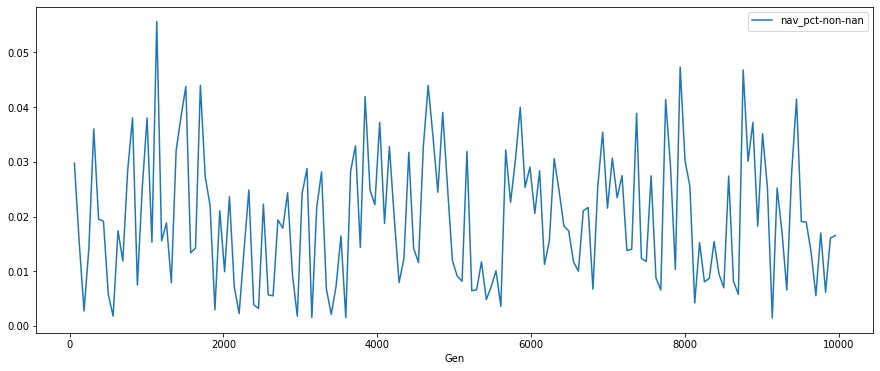

In [1638]:
print(df['Rep'].sum())
if df['Rep'].sum() != 0:
        df.plot(x="Gen", y = ['Rep'],
                kind="line", figsize=(15, 6))
        plt.show()

df2 = pd.DataFrame()
df2['nav_pct-non-nan'] = df['nav_pct'].dropna()
df2['nav_pct-non-nan'] = df2['nav_pct-non-nan'][df2['nav_pct-non-nan'] <1000]
df2['Gen'] = df['Gen']
df2.plot(x="Gen", y = ['nav_pct-non-nan'],
                kind="line", figsize=(15, 6))
plt.show()

In [1639]:
if df['Rep'].sum() != 0:
        df['Rep10'] = 2 * df['Rep']
        df.plot(x="Gen", y = ['Rep10','WShare_TF'],
                kind="line", figsize=(15, 6))
        plt.show()

        df.plot(x="Gen", y = ['Rep10','WShare_VI'],
        kind="line", figsize=(15, 6))
        plt.show()

        df.plot(x="Gen", y = ['Rep10','WShare_NT'],
        kind="line", figsize=(15, 6))
        plt.show()

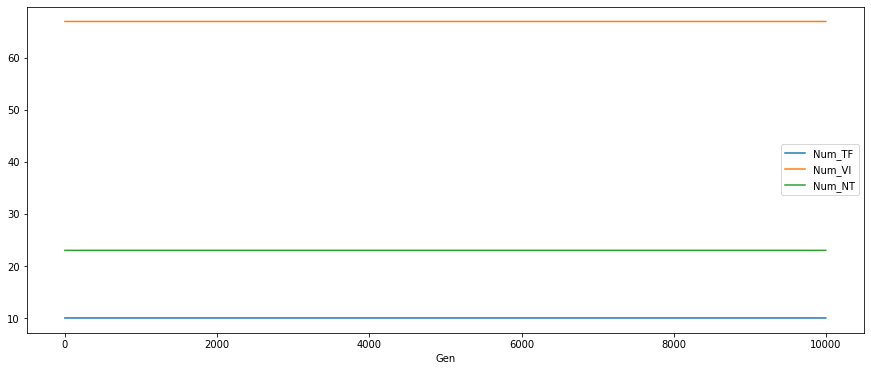

In [1640]:
# Basic plots

df.plot(x="Gen", y = ["Num_TF", "Num_VI", "Num_NT"],
        kind="line", figsize=(15, 6))
plt.savefig('/Users/aymericvie/Documents/GitHub/evology/evology/figures/num_evo.png', dpi = 300)
plt.show()

Average wealth per fund in the strategy


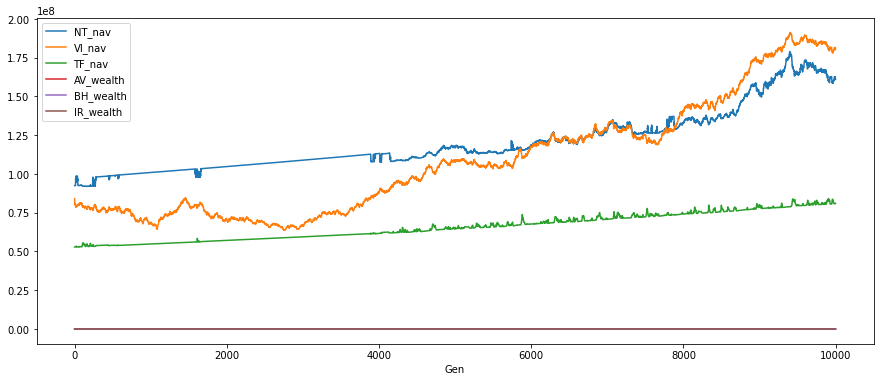

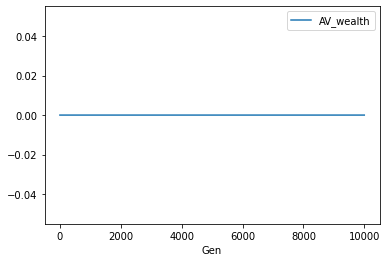

1.7409008441409344
2.1447786765117143


In [1641]:
''' NAV '''
print('Average wealth per fund in the strategy')
df.plot(x="Gen", y = ["NT_nav", "VI_nav", "TF_nav", "AV_wealth", "BH_wealth", "IR_wealth"],
        kind="line", figsize=(15, 6))
plt.show()

df.plot(x="Gen", y="AV_wealth")
plt.show()

NT_mul = df["NT_nav"].iloc[-1] / df["NT_nav"].iloc[0]  
print(NT_mul)
NT_mul = df["VI_nav"].iloc[-1] / df["VI_nav"].iloc[0]  
print(NT_mul)
